### Find a mean of a set of signals

In [ ]:
# upload csv to colab
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving data1.csv to data1.csv
Saving data2.csv to data2.csv
Saving data3.csv to data3.csv


In [ ]:
# reading data1.csv

# import library
import numpy as np

# open csv, strip out white space, and split to list of string using ','
data = []
for line in open('data1.csv'):
  data.append(line.strip().split(','))

# remove " from the string inside list using list comprehension
data1 = [[x.replace('\"','') for x in i] for i in data]

# convert string to float
data1_f = np.asarray(data1, float)

print(data1_f)

[[ 7.98631 16.82952 19.65165]
 [ 7.1446  10.41674  3.81853]
 [ 7.48549 14.61958  8.87193]
 [ 8.66521 14.14244 10.10248]
 [14.80968 12.82048 13.41792]]


In [ ]:
# Write a mean_datasets function that reads in a list of CSV files and returns an array of the mean of each cell in the data files

def mean_datasets(file_names):
  import numpy as np
  data_m = []
  for file in file_names:
    data_n = []
    for line in open(file):
      data_n.append(line.strip().split(','))
      data_remove = [[x.replace('\"','') for x in i] for i in data_n]
      data_clean = np.asarray(data_remove, float)
    data_m.append(data_clean)
  #return data_m


  def calculating_mean(data_m):
    result = sum(data_m)/ len(data_m)
    return np.round(result,1)

  return(calculating_mean(data_m))

In [ ]:
# Mean of the three datasets
print(mean_datasets(['data1.csv', 'data2.csv','data3.csv']))

[[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]




---



### Write a ```load_fits``` function that loads in a FITS file and finds the position of the brightest pixel in its image data. To make this function work for arbitrary files, pass the name of the FITS file as an argument to the function.

In [9]:
# import libraries
from astropy.io import fits
import numpy as np

# open fits file
image_file = fits.open('http://chandra.harvard.edu/photo/2009/crab/fits/crab.fits')

In [10]:
# check header information
image_file[0].header

 [astropy.io.fits.verify]



SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'CRAB NEBULA'                                                         
DATE-OBS= '2001-01-30T23:58:06'                                                 
DATE-END= '2001-01-31T07:04:06'                                                 
LTM1_1  =                    2                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    2                                                  
LTV1    =              -7680

In [11]:
# get file info
image_file.info()

image_data = image_file[0].data
print(image_data.shape)

Filename: /root/.astropy/cache/download/url/0df80e2933d4e311a178db1962e2dc7b/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   
(1024, 1024)


In [12]:
image_data = image_file[0].data
image_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
# find max brightness value within the array

print(image_data.max())
print(np.max(image_data))
print(image_data.argmax()) # get the position (flat) of the max value in the array

143.0
143.0
728529


In [85]:
# find indices of where the brightest spot is

indices = np.where(image_data == image_data.max())
indices

(array([711]), array([465]))

In [86]:
# convert a flat index or array of flat indices into a tuple of coordinate arrays
from numpy import unravel_index

ind = unravel_index(image_data.argmax(), image_data.shape)
ind

(711, 465)

In [87]:
# function to read FITS file and identify the brightest pixel

def load_fits(x):
  import numpy as np
  from astropy.io import fits
  from numpy import unravel_index

  file = fits.open(x) # open FITS file
  file1 = file[0].data
  pos = file1.argmax() # get the position (flat) of the max value in the array
  ind = unravel_index(pos, file1.shape) # this return indices as tuple

  return ind

In [88]:
# check result

load_fits('http://chandra.harvard.edu/photo/2009/crab/fits/crab.fits')

(711, 465)



---



### Write a ```mean_fits``` function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files.

### All the images have the same dimensions and your calculated mean array should match those dimensions. Assuming we will only look at the central value of your returned array, which is where we expect the pulsar to be


In [162]:
def mean_fits(*files):
  from astropy.io import fits
  import numpy as np

  data_sec = []
  for file in files:
    for i in file:
      open_file = fits.open(i)
      data_file = open_file[0].data
      data_sec.append(data_file)

  data = np.sum(data_sec, axis=0)
  count = np.size(files) # counting how many files were input, noting not using lens because input were arrays
  data_mean = data / count
  return data_mean

In [163]:
# check result
# assuming these are images of the same pulsars and their brightest pixels have been stacked at the centre
# actual files provided on the learning platform

data  = mean_fits(['http://chandra.harvard.edu/photo/2009/crab/fits/crab.fits', 'https://chandra.harvard.edu/photo/2008/cena/fits/cena_med.fits','https://chandra.harvard.edu/photo/2008/30dor/fits/30dor_high.fits'])[512,512]
print(data)

22.333334


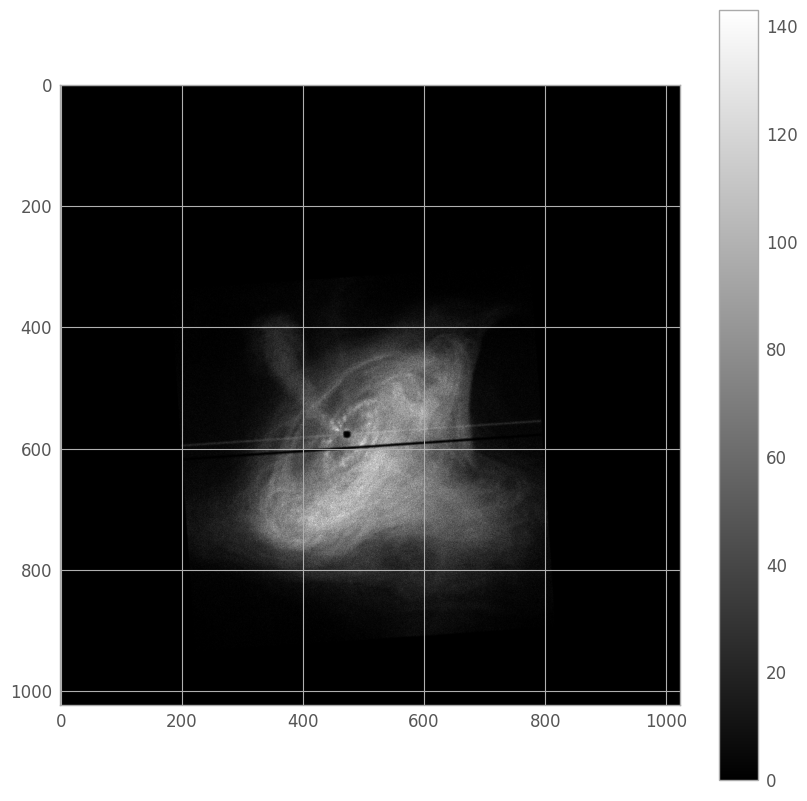

In [76]:
# visualise crab nebula in xray wavelength from Chandra

# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.visualization import astropy_mpl_style


plt.style.use(astropy_mpl_style)
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='gray')
plt.colorbar()